In [2]:
import matplotlib.pyplot as plt
import numpy as np
import librosa

In [13]:
file_path = 'gztan_dataset/genres_original/jazz/jazz.00012.wav'
samples, sample_rate = librosa.load(file_path, sr=None, mono=True)

## Waveform

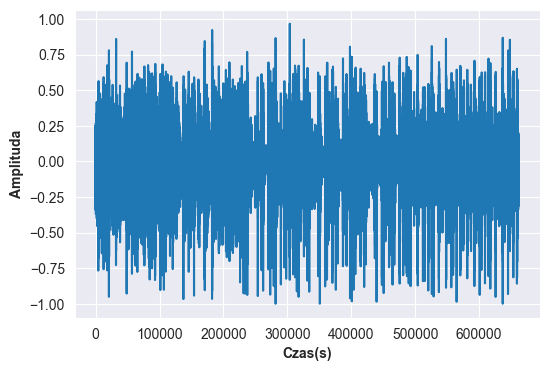

In [4]:
plt.figure(figsize=(6, 4))
plt.plot(samples)
plt.xlabel('Czas(s)', fontweight='bold')
plt.ylabel('Amplituda', fontweight='bold')
plt.savefig('plots/fala_dzwiekowa.png', dpi=300, bbox_inches='tight')

## Fourier Transform

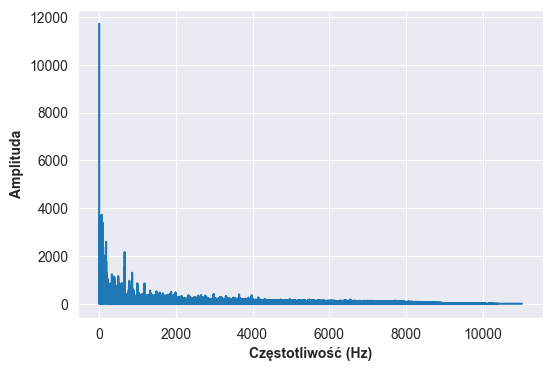

In [5]:
fft_result = np.fft.fft(samples)
magnitude = np.abs(fft_result)
frequency = np.linspace(0, sample_rate, len(magnitude))

plt.figure(figsize=(6, 4))
plt.plot(frequency[:int(len(frequency) / 2)], magnitude[:int(len(magnitude) / 2)])  
plt.xlabel('Częstotliwość (Hz)', fontweight='bold')
plt.ylabel('Amplituda', fontweight='bold')
plt.savefig('plots/fourier.png', dpi=300, bbox_inches='tight')


## STFT

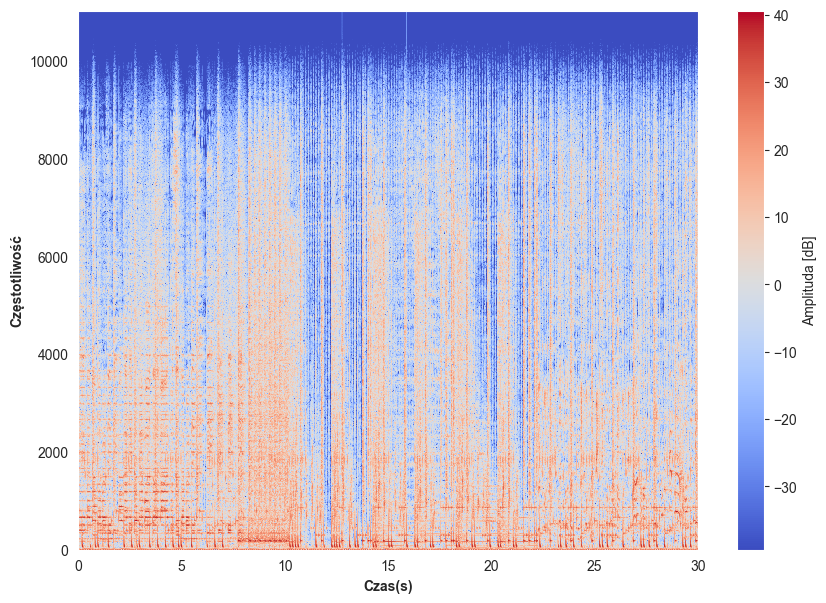

In [6]:
stft_result = librosa.stft(samples)
stft_db = librosa.amplitude_to_db(abs(stft_result))

plt.figure(figsize=(10, 7))
librosa.display.specshow(stft_db, sr=sample_rate, x_axis='time', y_axis='hz')
plt.colorbar(label='Amplituda [dB]')
plt.xlabel('Czas(s)', fontweight='bold')
plt.ylabel('Częstotliwość', fontweight='bold')
plt.savefig('plots/stft.png', dpi=300, bbox_inches='tight')


## Melspectogram

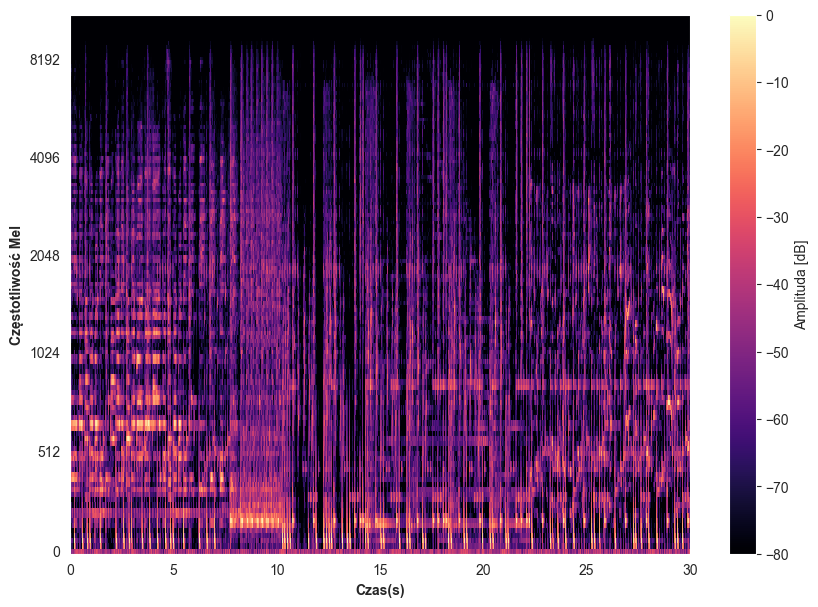

In [7]:
S = librosa.feature.melspectrogram(y=samples, sr=sample_rate)
S_DB = librosa.amplitude_to_db(S, ref=np.max)

plt.figure(figsize=(10, 7))
librosa.display.specshow(S_DB, sr=sample_rate, x_axis='time', y_axis='mel')
plt.colorbar(label='Amplituda [dB]')
plt.xlabel('Czas(s)', fontweight='bold')
plt.ylabel('Częstotliwość Mel', fontweight='bold')
plt.savefig('plots/mel_spectrogram.png', dpi=300, bbox_inches='tight')

## MFCC

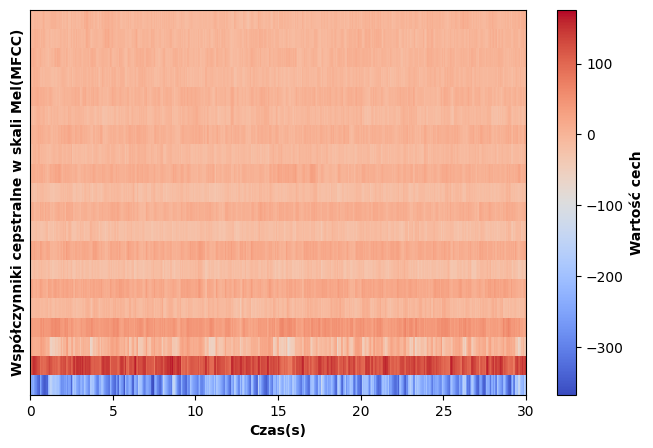

In [20]:
mfccs = librosa.feature.mfcc(y=samples, sr=sample_rate)

plt.figure(figsize=(8, 5))
librosa.display.specshow(mfccs, sr=sample_rate, x_axis='time')
cbar = plt.colorbar()
cbar.set_label('Wartość cech', fontweight='bold')
plt.xlabel('Czas(s)', fontweight='bold')
plt.ylabel('Współczynniki cepstralne w skali Mel(MFCC)', fontweight='bold')
plt.savefig('plots/mfcc.png', dpi=300, bbox_inches='tight')